In [1]:
from google.colab import files
files.upload() # kaggle.jsonをアップロード
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


  0% 0.00/352k [00:00<?, ?B/s]
100% 352k/352k [00:00<00:00, 49.8MB/s]
Archive:  pharma-sales-data.zip
  inflating: salesdaily.csv          
  inflating: saleshourly.csv         
  inflating: salesmonthly.csv        
  inflating: salesweekly.csv         
[M01AB] [0.   8.   2.   ... 4.   7.34 0.33] Removed:3
[M01AE] [ 3.67   4.     1.    ... 11.69   4.507  1.73 ] Removed:5
[N02BA] [3.4 4.4 6.5 ... 2.  3.  0.5] Removed:9
[N02BE] [32.4  50.6  61.85 ... 34.6  50.8  44.3 ] Removed:13
[N05B] [ 7. 16. 10. ...  6.  6. 20.] Removed:21
[N05C] [0. 0. 0. ... 0. 0. 2.] Removed:42
[R03] [ 0. 20.  9. ...  5. 10.  2.] Removed:50
[R06] [2.  4.  1.  ... 4.2 1.  0. ] Removed:53


<Figure size 50400x21600 with 0 Axes>

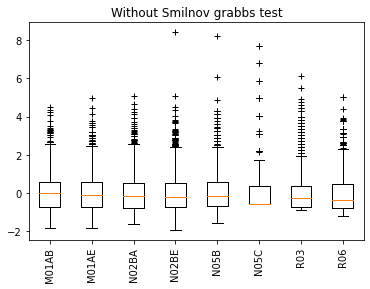

<Figure size 50400x21600 with 0 Axes>

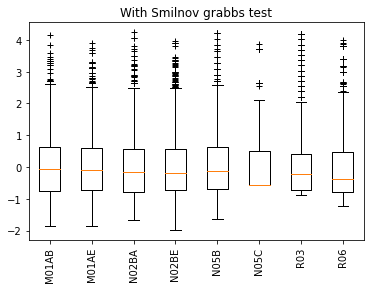

In [3]:
# スミルノフ・グラブス検定用のライブラリをインストール
!pip install outlier_utils
import pandas as pd
import numpy as np
from outliers import smirnov_grubbs as grubbs
from sklearn.preprocessing import StandardScaler
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt


# データの準備
def prepare():
    !kaggle datasets download -d \
    milanzdravkovic/pharma-sales-data
    !unzip pharma-sales-data.zip


# データフレームの作成（外れ値も除去）
def preprocess():
    df = pd.read_csv('salesdaily.csv')
    odf = df

    # 特徴量は各医薬品の売り上げデータ
    features = ['M01AB','M01AE','N02BA','N02BE',
  'N05B','N05C','R03','R06']


    for f in features:
        # スミルノフ・グラブス検定による外れ値除去
        # alphaは式(3.5)における （統計的有意性）を示す
        res = grubbs.test(
                df.loc[:,[f]].values, alpha=0.05) 
        print('[{}] {} Removed:{}'.format(f, res, 
                              len(odf)-len(res)))
        # 検出された外れ値を除外したデータから
        # データフレームを作成
        df = df[df[f].isin(res)]
    df = pd.DataFrame(df,columns=features)  
    return odf, df, features


# 箱ひげ図の作成
def disp_box(data, fields, flag): 
    plt.figure(figsize=(700,300)) 
    fig, ax = plt.subplots()
    dt = data.loc[:, fields]
    sc = StandardScaler()
    dt = sc.fit_transform(dt)


    bp = ax.boxplot(dt,
           notch=False, sym='+', vert=True, whis=1.5, 
           positions=None, widths=None,
           patch_artist=False, bootstrap=None, 
           usermedians=None, conf_intervals=None) 
    ax.set_xticklabels(fields)
    plt.xticks(rotation=90)
    if flag == 0:
        plt.title('Without Smilnov grabbs test')
        plt.savefig('3.7_without_smilnov.png', dpi=500)
    else:
        plt.title('With Smilnov grabbs test') 
        plt.savefig('3.7_with_smilnov.png', dpi=500)
    plt.show()

def main():
    prepare()
    od, df, features = preprocess()
    # スミルノフ・グラブス検定を行わずに箱ひげ図を作成
    disp_box(od, features, flag=0)
    # スミルノフ・グラブス検定により外れ値除去後に
    # 箱ひげ図を作成
    disp_box(df, features, flag=1)

if __name__ == '__main__':
    main()